In [1]:
# text-embedding-3-small	$0.02 / 1M tokens
# text-embedding-3-large	$0.13 / 1M tokens

import tiktoken

In [2]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
encoding

<Encoding 'cl100k_base'>

In [3]:
import pandas as pd

In [4]:
# link to data: https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
df = pd.read_csv('../large_files/bbc_text_cls.csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
total_tokens = 0
def update_total(text):
    global total_tokens
    ints = encoding.encode(text)
    total_tokens += len(ints)

df['text'].apply(update_total)
total_tokens

1068453

In [7]:
len(df)

2225

In [8]:
df_small = df.sample(100)

In [9]:
df_small.shape

(100, 2)

<Axes: >

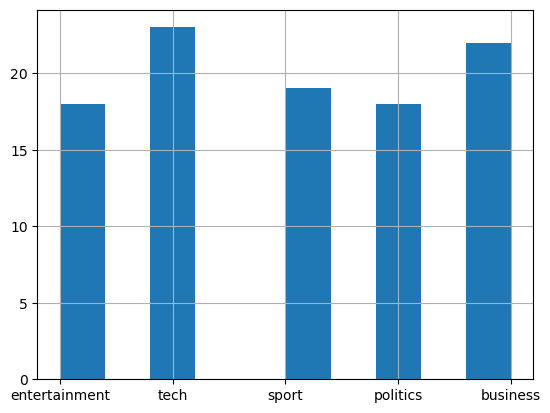

In [11]:
df_small['labels'].hist()

In [12]:
from openai import OpenAI

In [13]:
client = OpenAI()

In [14]:
text = df_small['text'].iloc[0]
text

'Da Vinci Code is \'lousy history\'\n\nThe plot of an international bestseller that thousands of readers are likely to receive as a Christmas present is \'laughable\', a clergyman has said.\n\nThe Da Vinci Code claims Jesus was not crucified, but married Mary Magdalene and died a normal death. It claims this was later covered up by the Church. The Bishop of Durham, the Rt Rev Dr Tom Wright, described the novel as a "great thriller" but "lousy history". The book has sold more than seven million copies worldwide. Despite enjoying Dan Brown\'s conspiracy theory, the Bishop said there was a lack of evidence to back up its claims.\n\nWriting his Christmas message in the Northern Echo, the Bishop said: "Conspiracy theories are always fun - fun to invent, fun to read, fun to fantasise about. "Dan Brown is the best writer I\'ve come across in the genre, but anyone who knows anything about 1st century history will see that this underlying material is laughable." A great deal of credible evidenc

In [15]:
text = text.replace("\n", " ")

In [16]:
emb = client.embeddings.create(
    input=[text],
    model='text-embedding-3-small'
)
emb

CreateEmbeddingResponse(data=[Embedding(embedding=[-0.028109032660722733, 0.045508675277233124, -0.017861468717455864, -0.024089891463518143, -0.004480969160795212, -0.04046602547168732, -0.010572091676294804, -0.02438945509493351, -0.018510522320866585, -0.0376451350748539, -0.008306643925607204, 0.003938010428100824, -0.07698779553174973, 0.04183902218937874, 0.025138363242149353, 0.014216779731214046, -0.01711256057024002, 0.04710634797811508, 0.0014993773074820638, 0.010965269058942795, 0.009517379105091095, 0.033276502043008804, 0.027884360402822495, 0.029257358983159065, -0.006908681243658066, -0.01932184025645256, -0.02280426397919655, 0.004864784888923168, 0.03137926757335663, 0.003153217025101185, -0.026386544108390808, -0.00939256139099598, 0.01935928501188755, 0.00848762970417738, -0.028059106320142746, 0.04443524032831192, 0.029956340789794922, -0.0539214126765728, -0.007801130414009094, -0.0387185700237751, 0.02377784624695778, 0.010865414515137672, -0.025138363242149353, 

In [17]:
emb.data

[Embedding(embedding=[-0.028109032660722733, 0.045508675277233124, -0.017861468717455864, -0.024089891463518143, -0.004480969160795212, -0.04046602547168732, -0.010572091676294804, -0.02438945509493351, -0.018510522320866585, -0.0376451350748539, -0.008306643925607204, 0.003938010428100824, -0.07698779553174973, 0.04183902218937874, 0.025138363242149353, 0.014216779731214046, -0.01711256057024002, 0.04710634797811508, 0.0014993773074820638, 0.010965269058942795, 0.009517379105091095, 0.033276502043008804, 0.027884360402822495, 0.029257358983159065, -0.006908681243658066, -0.01932184025645256, -0.02280426397919655, 0.004864784888923168, 0.03137926757335663, 0.003153217025101185, -0.026386544108390808, -0.00939256139099598, 0.01935928501188755, 0.00848762970417738, -0.028059106320142746, 0.04443524032831192, 0.029956340789794922, -0.0539214126765728, -0.007801130414009094, -0.0387185700237751, 0.02377784624695778, 0.010865414515137672, -0.025138363242149353, -0.03829418867826462, -0.0342

In [18]:
emb.data[0]

Embedding(embedding=[-0.028109032660722733, 0.045508675277233124, -0.017861468717455864, -0.024089891463518143, -0.004480969160795212, -0.04046602547168732, -0.010572091676294804, -0.02438945509493351, -0.018510522320866585, -0.0376451350748539, -0.008306643925607204, 0.003938010428100824, -0.07698779553174973, 0.04183902218937874, 0.025138363242149353, 0.014216779731214046, -0.01711256057024002, 0.04710634797811508, 0.0014993773074820638, 0.010965269058942795, 0.009517379105091095, 0.033276502043008804, 0.027884360402822495, 0.029257358983159065, -0.006908681243658066, -0.01932184025645256, -0.02280426397919655, 0.004864784888923168, 0.03137926757335663, 0.003153217025101185, -0.026386544108390808, -0.00939256139099598, 0.01935928501188755, 0.00848762970417738, -0.028059106320142746, 0.04443524032831192, 0.029956340789794922, -0.0539214126765728, -0.007801130414009094, -0.0387185700237751, 0.02377784624695778, 0.010865414515137672, -0.025138363242149353, -0.03829418867826462, -0.03422

In [19]:
emb.data[0].embedding

[-0.028109032660722733,
 0.045508675277233124,
 -0.017861468717455864,
 -0.024089891463518143,
 -0.004480969160795212,
 -0.04046602547168732,
 -0.010572091676294804,
 -0.02438945509493351,
 -0.018510522320866585,
 -0.0376451350748539,
 -0.008306643925607204,
 0.003938010428100824,
 -0.07698779553174973,
 0.04183902218937874,
 0.025138363242149353,
 0.014216779731214046,
 -0.01711256057024002,
 0.04710634797811508,
 0.0014993773074820638,
 0.010965269058942795,
 0.009517379105091095,
 0.033276502043008804,
 0.027884360402822495,
 0.029257358983159065,
 -0.006908681243658066,
 -0.01932184025645256,
 -0.02280426397919655,
 0.004864784888923168,
 0.03137926757335663,
 0.003153217025101185,
 -0.026386544108390808,
 -0.00939256139099598,
 0.01935928501188755,
 0.00848762970417738,
 -0.028059106320142746,
 0.04443524032831192,
 0.029956340789794922,
 -0.0539214126765728,
 -0.007801130414009094,
 -0.0387185700237751,
 0.02377784624695778,
 0.010865414515137672,
 -0.025138363242149353,
 -0.0382

In [20]:
type(emb.data[0].embedding)

list

In [21]:
text2 = df_small['text'].iloc[0]
emb2 = client.embeddings.create(
    input=[text2],
    model='text-embedding-3-small'
)

In [22]:
import numpy as np

In [23]:
np.allclose(emb.data[0].embedding, emb2.data[0].embedding)

False

In [24]:
e1 = np.array(emb.data[0].embedding)
e2 = np.array(emb2.data[0].embedding)

In [25]:
np.abs(e1 - e2).sum()

8.001887903878014

In [26]:
embs = client.embeddings.create(
    input=["I like cats", "I like eggs"],
    model='text-embedding-3-small'
)

In [27]:
len(embs.data)

2

In [28]:
len(embs.data[0].embedding)

1536

In [29]:
len(embs.data[1].embedding)

1536

In [31]:
e3 = np.array(embs.data[0].embedding)
e4 = np.array(embs.data[1].embedding)
np.abs(e3 - e4).sum()

29.83670199826065

In [32]:
np.linalg.norm(e3)

0.9999999590311125

In [33]:
# why do we care? when the norms of x and y are 1,
# cosine distance is the same as L2 distance!
np.linalg.norm(e4)

1.0000000057065364

In [34]:
model_name = 'text-embedding-3-small'

In [35]:
def get_embedding(text):
    text = text.replace("\n", " ")
    emb = client.embeddings.create(
        input=[text],
        model=model_name,
    )
    return emb.data[0].embedding

In [36]:
df_small['embeddings'] = df_small['text'].apply(get_embedding)

In [37]:
df_small.head()

,text,labels,embeddings
518,Da Vinci Code is 'lousy history'\n\nThe plot o...,entertainment,"[-0.028109032660722733, 0.045508675277233124, ..."
769,Singer Christina Aguilera to wed\n\nPop star C...,entertainment,"[-0.031066957861185074, 0.006286822725087404, ..."
2060,Microsoft takes on desktop search\n\nMicrosoft...,tech,"[-0.00351920397952199, -0.0022171849850565195,..."
1415,Duff ruled out of Barcelona clash\n\nChelsea's...,sport,"[0.009496399201452732, -9.685883924248628e-06,..."
1363,IAAF to rule on Greek sprint pair\n\nGreek spr...,sport,"[0.021366635337471962, 0.0061317915096879005, ..."


In [38]:
import faiss

In [39]:
dims = len(embs.data[0].embedding)
dims

1536

In [40]:
index = faiss.IndexFlatL2(dims)

In [41]:
# we could also call faiss.normalize_L2(vectors)
# but this isn't necessary b/c they're already normalized

# won't work in this format
index.add(df_small['embeddings'])

ValueError: not enough values to unpack (expected 2, got 1)

In [42]:
index2 = faiss.IndexFlatL2(dims)
index2.add(df_small[['embeddings']])

AssertionError: 

In [43]:
vectors = df_small['embeddings'].tolist()

In [45]:
index.add(vectors)

AttributeError: 'list' object has no attribute 'shape'

In [46]:
vectors = np.array(vectors) # N x D
index.add(vectors)

In [50]:
print(df_small['text'].sample(random_state=1).iloc[0])

China continues breakneck growth

China's economy has expanded by a breakneck 9.5% during 2004, faster than predicted and well above 2003's 9.1%.

The news may mean more limits on investment and lending as Beijing tries to take the economy off the boil. China has sucked in raw materials and energy to feed its expansion, which could have knock-on effects on the rest of the world if it overheats. But officials pointed out that industrial growth had slowed, with services providing much of the impetus. Growth in industrial output - the main target of government efforts to impose curbs on credit and investments - was 11.5% in 2004, down from 17% the previous year.

Still, consumer prices - at 2.4% - rose faster than in 2004, adding to concern that a sharp rise in producer prices of 7.1% could stoke inflation. And overall investment in fixed assets was still high, up 21.3% from the previous year - although some way off the peak of 43% seen in the first quarter of 2004. The result could be hi

In [51]:
query = """By what percentage did China's economy expand in 2004?"""

In [52]:
query_emb = get_embedding(query)
query_emb

[0.03096630796790123,
 -0.025795312598347664,
 0.034546226263046265,
 0.05867091193795204,
 0.023746803402900696,
 0.026849400252103806,
 -0.0304094310849905,
 0.09665784239768982,
 0.0009204620728269219,
 0.01136624626815319,
 0.015711871907114983,
 0.03914045915007591,
 -0.03381035476922989,
 0.0023667248897254467,
 -0.005136190913617611,
 0.014568286016583443,
 -0.0447092242538929,
 -0.06801848113536835,
 -0.024323567748069763,
 -0.02935534343123436,
 0.01488650031387806,
 -0.0023679679725319147,
 0.013086596503853798,
 -0.022573385387659073,
 0.0008651473326608539,
 0.017511775717139244,
 -0.02961389347910881,
 -0.08019021153450012,
 -0.0481698140501976,
 -0.01136624626815319,
 -0.011425911448895931,
 -0.015383712016046047,
 0.0296337828040123,
 -0.022314835339784622,
 -0.03472522273659706,
 -0.008020015433430672,
 -0.02949456311762333,
 -0.0063742464408278465,
 0.040174659341573715,
 -0.03084697760641575,
 0.016855455935001373,
 0.0005776971811428666,
 -0.007299059070646763,
 0.00

In [53]:
distances, indices = index.search(query_emb, k=5)

AttributeError: 'list' object has no attribute 'shape'

In [54]:
query_emb = np.array(query_emb).reshape(1, -1)
distances, indices = index.search(query_emb, k=5)

In [55]:
distances

array([[0.6792603, 1.4007888, 1.4554465, 1.4909914, 1.4975927]],
      dtype=float32)

In [56]:
indices

array([[80, 94, 57, 65, 97]])

In [59]:
df_small.iloc[indices[0][0]].text

'China continues breakneck growth\n\nChina\'s economy has expanded by a breakneck 9.5% during 2004, faster than predicted and well above 2003\'s 9.1%.\n\nThe news may mean more limits on investment and lending as Beijing tries to take the economy off the boil. China has sucked in raw materials and energy to feed its expansion, which could have knock-on effects on the rest of the world if it overheats. But officials pointed out that industrial growth had slowed, with services providing much of the impetus. Growth in industrial output - the main target of government efforts to impose curbs on credit and investments - was 11.5% in 2004, down from 17% the previous year.\n\nStill, consumer prices - at 2.4% - rose faster than in 2004, adding to concern that a sharp rise in producer prices of 7.1% could stoke inflation. And overall investment in fixed assets was still high, up 21.3% from the previous year - although some way off the peak of 43% seen in the first quarter of 2004. The result co

In [60]:
def complete(user_prompt, max_tokens=100):
    completion = client.chat.completions.create(
        model='gpt-3.5-turbo',
        messages=[
            {"role": "user", "content": user_prompt},
        ],
        temperature=0,
        max_tokens=max_tokens,
    )
    return completion

def print_response(completion):
    content = completion.choices[0].message.content
    print(content)

In [61]:
def qa(question, context):
    prompt = f"""Please answer the question given the provided \
    context.
    
    Question:
    
    ```
    {question}
    ```
    
    Context:
    
    ```
    {context}
    ```
    """
    
    completion = complete(prompt)
    print_response(completion)

In [62]:
qa(query, df_small.iloc[indices[0][0]].text)

China's economy expanded by 9.5% in 2004.


In [63]:
completion = complete(query)
print_response(completion)

China's economy expanded by 10.1% in 2004.


![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=AVRK7SgM9ASkQf5TAqs_wA&n=Embeddings+and+RAG)